# Final ML Project: Medical Adherence Prediction

## Can a random forest model identify the patients who are most likely to show low medication adherence?

#### Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV

#### Load Data

In [2]:
df = pd.read_csv('diabetes_data.csv')
df.head(10)

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential
5,6005,65,0,0,0,0,15.820815,1,17.781024,9.252522,...,0,86.378969,0,0,0,1.535161,9.682226,2.744281,0,Confidential
6,6006,61,1,2,1,3,20.075147,0,1.086479,8.745650,...,0,86.036931,0,0,0,0.578208,1.175504,1.229453,0,Confidential
7,6007,74,1,3,0,3,29.438938,0,6.187378,9.114535,...,0,47.315820,0,0,0,1.659424,2.258377,9.035877,0,Confidential
8,6008,54,0,0,1,2,15.027557,0,19.505734,0.590771,...,0,88.638130,0,0,0,3.675916,2.006186,3.452805,1,Confidential
9,6009,82,1,0,1,1,34.300044,1,15.943844,6.056621,...,0,96.636541,0,0,0,2.567315,4.031643,2.633287,0,Confidential


In [3]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.102714,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.303666,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000
max,7878.000000,90.000000,1.000000,3.000000,2.000000,3.000000,39.998811,1.000000,19.996231,9.993893,...,1.000000,1.000000,99.788530,1.000000,1.000000,1.000000,3.999715,9.997165,9.993029,1.000000


#### Continuous Variables

- **Age**
- **BMI**
- **AlcoholConsumption**
- **PhysicalActivity**
- **DietQuality**
- **SleepQuality**
- **SystolicBP**
- **DiastolicBP**
- **FastingBloodSugar**
- **HbA1c**
- **SerumCreatinine**
- **BUNLevels**
- **CholesterolTotal**
- **CholesterolLDL**
- **CholesterolHDL**
- **CholesterolTriglycerides**
- **FatigueLevels**
- **QualityOfLifeScore**
- **MedicalCheckupsFrequency**
- **HealthLiteracy**
- **MedicationAdherence** *(target)*

---

#### Discrete (Categorical/Binary) Variables

- **Gender**
- **Ethnicity**
- **SocioeconomicStatus**
- **EducationLevel**
- **Smoking**
- **FamilyHistoryDiabetes**
- **GestationalDiabetes**
- **PolycysticOvarySyndrome**
- **PreviousPreDiabetes**
- **Hypertension**
- **AntihypertensiveMedications**
- **Statins**
- **AntidiabeticMedications**
- **FrequentUrination**
- **ExcessiveThirst**
- **UnexplainedWeightLoss**
- **BlurredVision**
- **SlowHealingSores**
- **TinglingHandsFeet**
- **HeavyMetalsExposure**
- **OccupationalExposureChemicals**
- **WaterQuality**
- **Diagnosis**


#### Given that medical adherence is our target variable, we will first make a distribution plot to see how it is distributed.

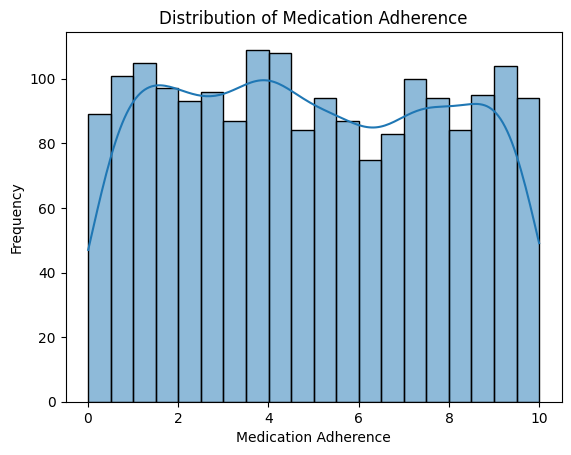

In [4]:
sns.histplot(df, x='MedicationAdherence', bins=20, kde=True)
plt.title('Distribution of Medication Adherence')
plt.xlabel('Medication Adherence')
plt.ylabel('Frequency')
plt.show()

#### In healthcare and the pharmaceutical industry, setting the adherence threshold at 5.0 out of 10 strikes a meaningful balance between clinical relevance and real-world actionability. Patients who score below this level are often considered at risk of not receiving the full benefit of their treatment, which can lead to worse health outcomes and higher healthcare costs. Companies like Eli Lilly, along with healthcare providers, focus heavily on identifying and supporting these patients early. By using a threshold of 5.0, we’re capturing those who show moderate or lower commitment to their medication regimen — the group most likely to benefit from targeted interventions like education, reminders, or personalized support. This approach mirrors how adherence is often handled in real-world disease management programs, making the model both practical and aligned with industry priorities.

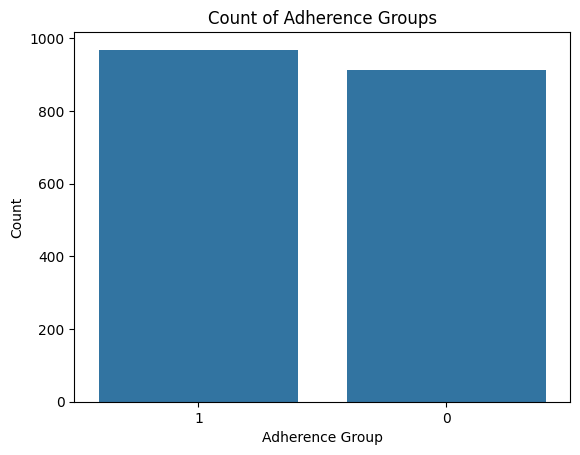

In [5]:
def preprocess_adherence_data(df):
    # Label adherence data into three groups of 0, 1, and 2
    df['AdherenceGroup'] = pd.cut(df['MedicationAdherence'], bins=[0, 5, 10], labels=[1, 0])
    # Drop the original MedicationAdherence column
    df.drop(columns=['MedicationAdherence'], inplace=True)
    return df
df = preprocess_adherence_data(df)

# Visualize the count of each adherence group
sns.countplot(x='AdherenceGroup', data=df)
plt.title('Count of Adherence Groups')
plt.xlabel('Adherence Group')
plt.ylabel('Count')
plt.show()


#### We can see that there are multi categorical variables such as ethnicity. We can use one hot encoding to convert these categorical variables into numerical variables.

In [6]:
# List of multi-categorical variables to encode
multi_categoricals = ['Ethnicity']

# One-hot encode
df = pd.get_dummies(df, columns=multi_categoricals, drop_first=True)

print(df.shape)
df.head()


(1879, 48)


,PatientID,Age,Gender,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,HealthLiteracy,Diagnosis,DoctorInCharge,AdherenceGroup,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,6000,44,0,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,0,1.782724,7.211349,1,Confidential,1,True,False,False
1,6001,51,1,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,1,3.381070,5.024612,1,Confidential,0,False,False,False
2,6002,89,1,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,2.701019,7.034944,0,Confidential,0,False,False,False
3,6003,21,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,1,1.409056,4.717774,0,Confidential,1,True,False,False
4,6004,27,1,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,1.218452,7.887940,0,Confidential,0,False,False,False


#### Drop Useless Columns

In [7]:
# Dropping PatientID and DoctorInCharge columns
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)

#### Prevalence

In [8]:
# Check prevalence of each adherence group
adherence_counts = df['AdherenceGroup'].value_counts(normalize=True)
print(adherence_counts)

AdherenceGroup
1    0.515168
0    0.484832
Name: proportion, dtype: float64


#### Defining Features (X) and Target (y)

In [9]:
X = df.drop(columns=['AdherenceGroup'])
y = df['AdherenceGroup'] 

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1879, 45)
Shape of y: (1879,)


#### Train/Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

(1315, 45) (564, 45)
AdherenceGroup
1    0.514829
0    0.485171
Name: proportion, dtype: float64
AdherenceGroup
1    0.515957
0    0.484043
Name: proportion, dtype: float64


#### Print Max Features

In [11]:
import numpy as np
print('max_features = ' + str(np.sqrt(X.shape[1]))) #around 6

max_features = 6.708203932499369


#### Random Forest Model

In [12]:
RFC = RandomForestClassifier(
    n_estimators=1000,             
    max_features=6,          
    bootstrap=True,
    max_samples=0.8,      
    max_depth=15,    
    oob_score=True,
    random_state=1984,
    n_jobs=-1
)

adherence_rf = RFC.fit(X_train, y_train)

#### Model Evaluation

In [36]:
# F1 score, Recall, Accuracy
y_pred = adherence_rf.predict(X_test)
print('Precision: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Precision:  0.5117647058823529
F1 Score:  0.5515055467511886
Recall:  0.5979381443298969


#### OOB Error

In [14]:
print('OOB error rate: ' + str(1 - adherence_rf.oob_score_))

OOB error rate: 0.47680608365019006


#### Confusion Matrix for Train

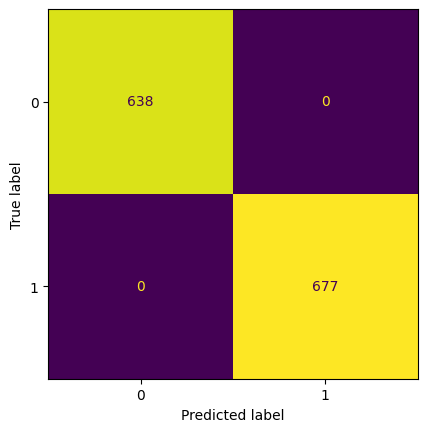

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(adherence_rf,X_train,y_train, colorbar= False)

#### Confusion Matrix for Test

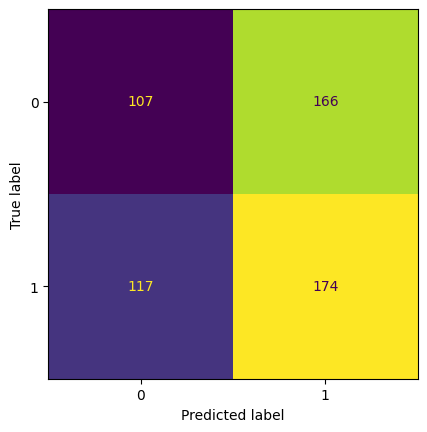

In [16]:
# Test data Confusion Matrix
y_pred = adherence_rf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(adherence_rf,X_test,y_test, colorbar= False)

#### Initial Model Evaluation

- Precision ≈ 0.51 – Of all patients the model flags as low-adherent (class 1) or adequately adherent (class 0), only about half are placed in the correct class.

- Recall ≈ 0.59 – Out of the true labels in the test set the model is retrieving only ~59 % of them correctly, so it is missing roughly one in every two low-adherent patients.

- F1 ≈ 0.55 – Because precision and recall are both stuck in the low to high 50 % range. The model is only marginally better than a coin-flip baseline (which would score ~0.50 on a perfectly balanced data set).

- OOB error ≈ 0.48 – With out-of-bag validation the forest misclassifies about 48 % of the bootstrap-held observations, echoing the mediocre generalisation seen on the test set (≈ 52 % OOB accuracy).

- The confusion-matrix on the test set shows that the model is struggling to generalise. Of the 451 patients it predicted, 174 truly low-adherent patients were correctly identified (true-positives), but 117 low-adherent patients were missed (false-negatives) – almost 4 in 10 at-risk patients slip through the net. Conversely, while 107 adherent patients were correctly recognised (true-negatives), the model incorrectly flagged 168 adherent patients as low adherent (false-positives), meaning the majority of its “alerts” would send outreach resources to people who do not need them. The imbalance between perfect performance on the training matrix (virtually no errors) and these sizeable error blocks on the test matrix indicates strong over-fitting: the forest memorised the training data but did not capture patterns that transfer to unseen patients.

#### Binary Class Probability

In [17]:
probs = adherence_rf.predict_proba(X_test)

# Row with highest positive class probability
max_pos_idx = np.argmax(probs[:, 1])
max_pos_prob = probs[max_pos_idx, 1]

# Row with highest negative class probability
max_neg_idx = np.argmax(probs[:, 0])
max_neg_prob = probs[max_neg_idx, 0]

print(f"Highest probability of being POSITIVE: row {max_pos_idx}, prob = {max_pos_prob:.4f}")
print(f"Highest probability of being NEGATIVE: row {max_neg_idx}, prob = {max_neg_prob:.4f}")

Highest probability of being POSITIVE: row 304, prob = 0.6546
Highest probability of being NEGATIVE: row 410, prob = 0.6435


#### Plotting the Distribution

/var/folders/hm/xnw5nd2n1yl25z8xd614c56w0000gn/T/ipykernel_39689/3451350458.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(positive_class_probs, shade=True, color='blue')


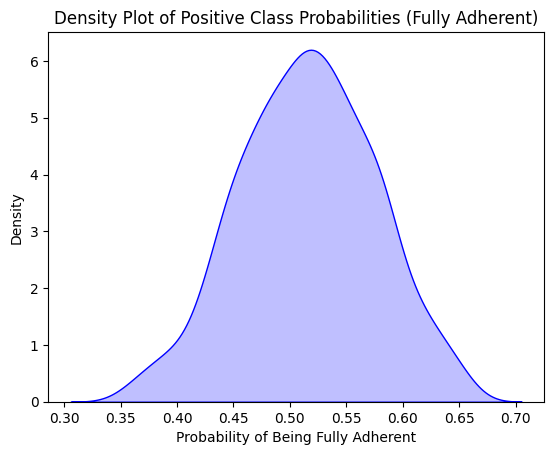

In [18]:
positive_class_probs = adherence_rf.predict_proba(X_test)[:, 1]
sns.kdeplot(positive_class_probs, shade=True, color='blue')

plt.title('Density Plot of Positive Class Probabilities (Fully Adherent)')
plt.xlabel('Probability of Being Fully Adherent')
plt.ylabel('Density')
plt.show()

#### Feature Importance Visualization

In [19]:
print(pd.DataFrame(adherence_rf.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance', ascending=False))

                               importance
CholesterolTriglycerides         0.053057
CholesterolLDL                   0.046962
CholesterolHDL                   0.046880
QualityOfLifeScore               0.046655
HealthLiteracy                   0.044071
HbA1c                            0.043526
DietQuality                      0.043384
SleepQuality                     0.043183
CholesterolTotal                 0.042431
BMI                              0.042291
FastingBloodSugar                0.042284
PhysicalActivity                 0.042256
BUNLevels                        0.041914
FatigueLevels                    0.041831
MedicalCheckupsFrequency         0.041489
SerumCreatinine                  0.041135
AlcoholConsumption               0.040102
SystolicBP                       0.038706
Age                              0.038610
DiastolicBP                      0.037098
EducationLevel                   0.014596
SocioeconomicStatus              0.010661
Statins                          0

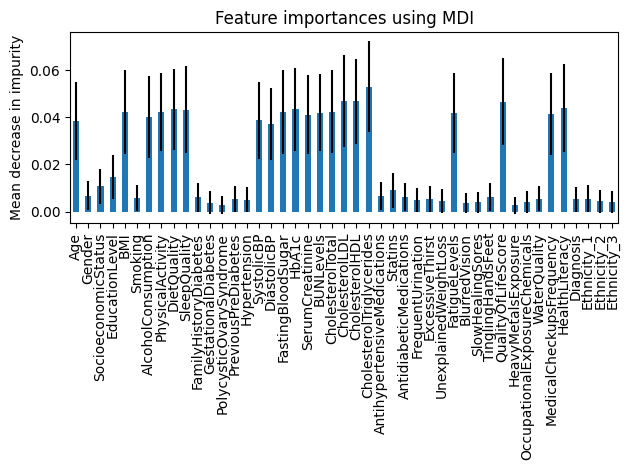

In [20]:
importances = adherence_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in adherence_rf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### Dropping Unimportant Features from Feature Importance

In [21]:
# Removing low importance features from X_train
low_importance_features = forest_importances[forest_importances < 0.01].index
X_train2 = X_train.drop(columns=low_importance_features)
X_test2 = X_test.drop(columns=low_importance_features)
print(f"X_train shape: {X_train2.shape}")
print(f"X_test shape: {X_test2.shape}")

X_train shape: (1315, 22)
X_test shape: (564, 22)


#### Gridsearch

In [22]:
# Grid Search for hyperparameter tuning
param_grid = {
    'max_samples': [0.3, 0.5, 0.8],
    'max_depth': [5, 10, 15, None],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(
        n_estimators=500,
        max_features=6,
        bootstrap=True,
        max_depth=None,
        oob_score=True,
        random_state=1984,
        n_jobs=-1
    ),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train2, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END .......................max_depth=5, max_samples=0.3; total time=   1.8s
[CV] END .......................max_depth=5, max_samples=0.3; total time=   1.8s
[CV] END .......................max_depth=5, max_samples=0.5; total time=   1.7s
[CV] END .......................max_depth=5, max_samples=0.3; total time=   1.8s
[CV] END .......................max_depth=5, max_samples=0.5; total time=   1.8s
[CV] END .......................max_depth=5, max_samples=0.8; total time=   1.8s
[CV] END .......................max_depth=5, max_samples=0.5; total time=   1.8s
[CV] END .......................max_depth=5, max_samples=0.8; total time=   2.0s
[CV] END ......................max_depth=10, max_samples=0.5; total time=   1.3s
[CV] END ......................max_depth=10, max_samples=0.3; total time=   1.4s
[CV] END .......................max_depth=5, max_samples=0.8; total time=   1.4s
[CV] END ......................max_depth=10, max

#### Finding Best n for Trees

In [23]:
n_estimators_list = [100,200,300,400,500,600,700,800,900,1000]
forest_list = [RandomForestClassifier(n_estimators = n,
        max_features=6,          
        bootstrap=True,
        max_samples=0.8,      
        max_depth=5,
        oob_score=True,
        random_state=1984,
        n_jobs=-1).fit(X_train2, y_train) for n in n_estimators_list]

forest_list[:3]

[RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8, n_jobs=-1,
                        oob_score=True, random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8,
                        n_estimators=200, n_jobs=-1, oob_score=True,
                        random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8,
                        n_estimators=300, n_jobs=-1, oob_score=True,
                        random_state=1984)]

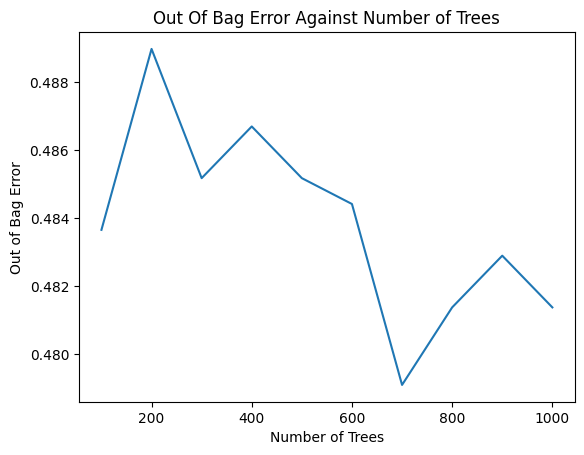

In [24]:
oob_errors = ([1-i.oob_score_ for i in forest_list])
plt.plot(n_estimators_list,oob_errors)
plt.title('Out Of Bag Error Against Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag Error')
plt.show()

#### Finding Best Max for Features

In [25]:
max_features_list = [1,2,3,4,5,6,7]

forest_list2 = [RandomForestClassifier(
        n_estimators = 800,
        max_features=n,          
        bootstrap=True,
        max_samples=0.8,      
        max_depth=5,   
        oob_score=True,
        random_state=1984,
        n_jobs=-1).fit(X_train2, y_train) for n in max_features_list]
forest_list2[:3]

[RandomForestClassifier(max_depth=5, max_features=1, max_samples=0.8,
                        n_estimators=800, n_jobs=-1, oob_score=True,
                        random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=2, max_samples=0.8,
                        n_estimators=800, n_jobs=-1, oob_score=True,
                        random_state=1984),
 RandomForestClassifier(max_depth=5, max_features=3, max_samples=0.8,
                        n_estimators=800, n_jobs=-1, oob_score=True,
                        random_state=1984)]

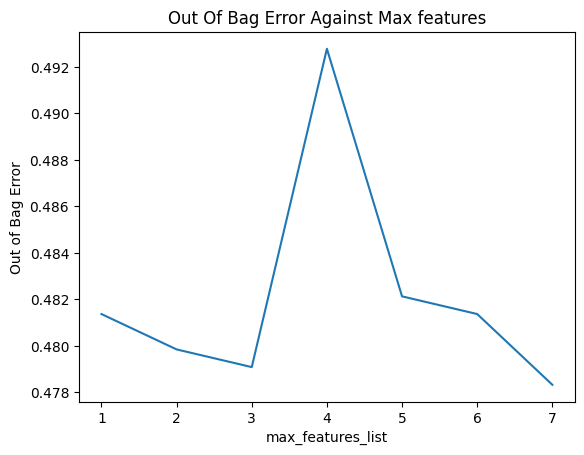

In [26]:
oob_errors1 = ([1-i.oob_score_ for i in forest_list2])
plt.plot(max_features_list,oob_errors1)
plt.title('Out Of Bag Error Against Max features')
plt.xlabel('max_features_list')
plt.ylabel('Out of Bag Error')
plt.show()

#### Best Model

In [27]:
adherence_rf_eng = forest_list2[5]
adherence_rf_eng

RandomForestClassifier(max_depth=5, max_features=6, max_samples=0.8,
                       n_estimators=800, n_jobs=-1, oob_score=True,
                       random_state=1984)

#### Best Model and Original Model Comparison

original model error: 0.47680608365019006
new model error: 0.4813688212927757


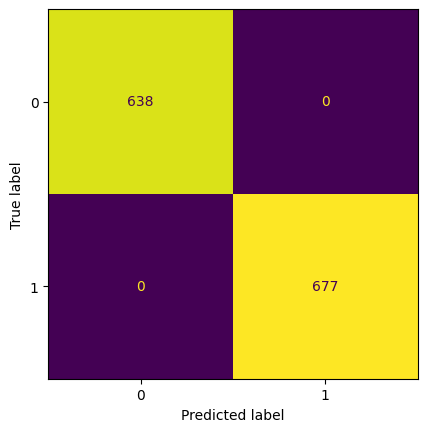

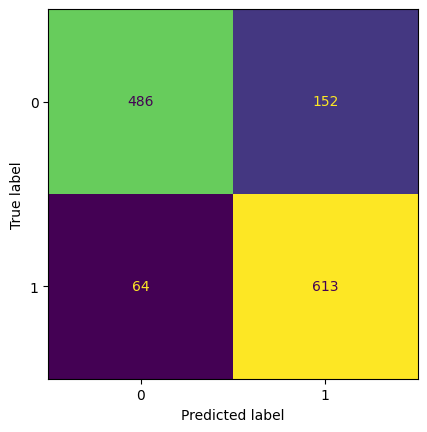

In [28]:
print('original model error: ' +str(1-adherence_rf.oob_score_))
ConfusionMatrixDisplay.from_estimator(adherence_rf,X_train,y_train, colorbar= False)

#New
print('new model error: ' + str(1-adherence_rf_eng.oob_score_))
ConfusionMatrixDisplay.from_estimator(adherence_rf_eng,X_train2,y_train, colorbar= False)

#### New Test Confusion Matrix

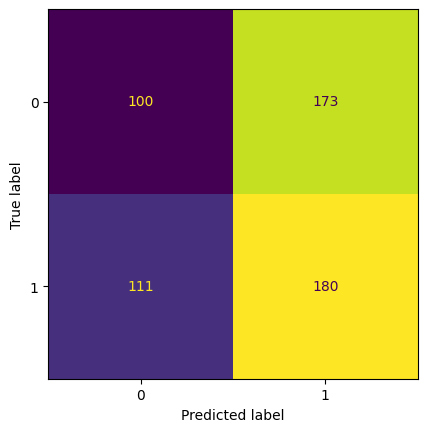

In [29]:
adherence_predict = adherence_rf_eng.predict(X_test2)
ConfusionMatrixDisplay.from_predictions(y_test,adherence_predict, colorbar= False)

#### Evaluation of the New Model
After hyperparameter tuning the Random Forest still classifies every training-set patient almost perfectly ( TP = 613, TN = 486, only 64 FN and 152 FP), but its performance drops noticeably on unseen data: in the test set only 180 of 291 low-adherent patients are caught (TPR ≈ 62 %), and 173 adherent patients are falsely flagged (FPR ≈ 64 %). The large gap between train and test confusion-matrices confirms that the revised model generalises a little better than the untuned version. False-negatives are down from 117 → 111 and true-positives up from 174 → 180 but it is still over-fitting: the classifier memorises most training examples while misclassifying roughly one-third of real at-risk patients and over-alerting on many good adherers.

#### Variable Importance for New Model

In [30]:
# Variable Importance
print(pd.DataFrame(adherence_rf_eng.feature_importances_,index = X_train2.columns,columns=['importance']).sort_values('importance', ascending=False))

                          importance
CholesterolTriglycerides    0.101901
QualityOfLifeScore          0.064961
CholesterolLDL              0.064485
CholesterolHDL              0.063971
HbA1c                       0.052112
SleepQuality                0.049764
DietQuality                 0.049171
HealthLiteracy              0.046090
BMI                         0.044285
CholesterolTotal            0.044122
BUNLevels                   0.044118
FatigueLevels               0.043244
MedicalCheckupsFrequency    0.041643
PhysicalActivity            0.041274
SerumCreatinine             0.041186
FastingBloodSugar           0.040312
Age                         0.039412
DiastolicBP                 0.035809
SystolicBP                  0.035486
AlcoholConsumption          0.035393
EducationLevel              0.014342
SocioeconomicStatus         0.006919


#### Accuracy Scores

In [35]:
y_pred = adherence_rf_eng.predict(X_test2)

print('Precision: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Precision:  0.509915014164306
F1 Score:  0.5590062111801242
Recall:  0.6185567010309279


#### ROC Curve

Text(0.5, 0, 'False Positive Rate')

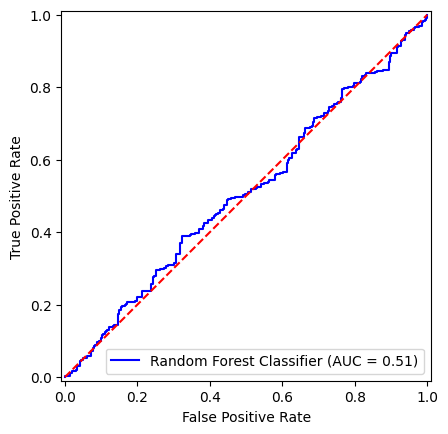

In [32]:
# ROC Curve
RocCurveDisplay.from_estimator(
    adherence_rf_eng,
    X_test2,
    y_test,
    name="Random Forest Classifier",
    color="blue",
)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [33]:
pred = adherence_rf_eng.predict_proba(X_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred)

ix =  np.argmax(tpr - fpr)
print('Best Threshold: %f' % thresholds[ix])

Best Threshold: 0.539456


#### ROC Curve
The ROC curve for the tuned Random Forest (blue line) hugs the 45-degree reference diagonal (red dashed) and the reported area under the curve is essentially 0.50. An AUC of 0.5 means the classifier can’t distinguish between low-adherence (positive) and adequate-adherence (negative) patients any better than random guessing: for every threshold, the gain in true-positive rate is matched by an almost-equal rise in false-positive rate. In short, despite the grid-search adjustments the model provides no practical discriminative value on the held-out test set, signalling the need for stronger feature engineering, rebalancing or a different modelling approach.

#### Optimal Point

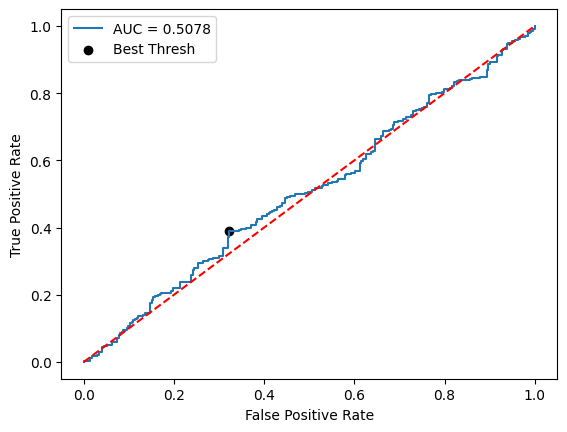

In [34]:
auc = metrics.roc_auc_score(y_test, pred)
plt.plot(fpr, tpr, label = 'AUC = %0.4f' % auc) 
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Thresh')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

#### Optimal Point
The optimal point ROC plot again confirms that the model’s discriminative power is essentially ineffective. The solid blue line (model) tracks almost exactly over the 45-degree red line that represents random guessing, and the AUC is ≈ 0.50. The black dot marks the threshold that maximises (TPR – FPR), but because the entire curve lies near the diagonal, that best threshold only shifts the operating point along a trade-off with no real gain: whichever cut-off I choose, roughly three quarters of low-adherence patients remain undetected (low TPR) once I hold the false-positive rate at a tolerable level. In other words, no threshold extracted from this curve will yield a clinically useful screening rule.

#### Conclusion
Despite the robustness of the Random Forest model, our results reveal several limitations. We used various parameter tuning techniques, including out-of-bag (OOB) error analysis and GridSearchCV, to prevent overfitting and reduce random error. Nevertheless, the model's AUC remained at 0.5078, indicating performance no better than random guessing. While the overall results were not ideal, we focused on improving the recall by raising it from 0.59 to 0.62 as recall was our main objective. Our goal was to increase true positives and reduce false negatives in order to more accurately identify individuals who struggle with medication adherence. This approach allows us to more effectively support the individuals who need it most, in which we can improve their health and well-being.

  
#### Future work
One of the limitations of our analysis was a lack of sufficient and relevant data. To improve model performance, we would need a larger dataset with more relevant features that are related to medication adherence, including behavioral patterns, socioeconomic factors, or medical history. Having these additional variables could provide deeper insights and enhance the model's ability to make accurate predictions.